# Inlämningsuppgift: Del 2 - Adversarial input attack

Victor Arvidsson \
viar19@student.bth.se

Ahmad Al-Mashahedi \
aham19@student.bth.se

# Instruktioner

Ändra notebookens platshållare så som era namn- och mailuppgifter samt instruktioner i de olika avsnitten. 

Notebookens underrubriker på nivå 3 (###) är bara ett enkelt exempel på hur er implementation kan delas upp. Ni bör skapa egna rubriker anpassade efter er implementation men lämna alla nivå 1 (#) och 2-rubriker (##) som de är. En viktig del inom data-science är att kunna presentera sina metoder och resultat på ett tydligt sätt. **En ostrukturerad och otydlig notebook kan påverka betygsättningen.**

Notera att t.ex. hyperparameter-tuning och annan optimisering för prestanda inte är nödvändigt i denna uppgift. Så länge modellen fungerar märkvärt bättre än ett "coin flip" så räcker det att ni väljer era hyperparametrar manuellt.

# Uppgiften

Uppgiften går ut på att göra så att bilden på koalan nedan klassificeras som en traktor istället. Givetvis ska bilden på koalan se helt oförändrad ut för det mänskliga ögat då attacken är genomförd. Nedan följer Pythonkod som läser in de båda bilderna som uppgiften bygger på samt läser in en ResNet50-modell som klassiciferar bilderna. Saknar ni några Python-paket, t.ex. TensorFlow så installera dem med en pakethanterarare, t.ex. pip

## Beskrivning av adversarial input attacker

Börja med att förklara vad denna typ av attacker är och hur de fungerar i rapportens sektion 2.1.

## Nedan följer kod för att läsa in bilderna och klassificera dem med ResNet50 modellen

In [1]:
from matplotlib import pyplot as plt
import numpy as np

import tensorflow as tf
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import BoundaryAttack
from art.utils import to_categorical

tf.compat.v1.disable_eager_execution()

print(f"TensorFlow: {tf.__version__}")

c:\Users\Victor\Desktop\BTH\DV2607-Sakerhet-i-AI-system\Assignment\Part2\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Victor\Desktop\BTH\DV2607-Sakerhet-i-AI-system\Assignment\Part2\env\lib\site-packages\art\estimators\certification\__init__.py:13: UserWarning: PyTorch not found. Not importing DeepZ functionality
  warnings.warn("PyTorch not found. Not importing DeepZ functionality")


TensorFlow: 2.10.0


In [2]:
# Loads the pretrained ResNet50 model
model = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# Load the two images (koala & tractor)
init_image = image.load_img("images/koala.jpeg", target_size=(224, 224))
init_image = image.img_to_array(init_image)

target_image = image.load_img("images/tractor.jpeg", target_size=(224, 224))
target_image = image.img_to_array(target_image)

class_lookup = {105: "koala", 866: "tractor"}

c:\Users\Victor\Desktop\BTH\DV2607-Sakerhet-i-AI-system\Assignment\Part2\env\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Init image class label: 105 (koala)


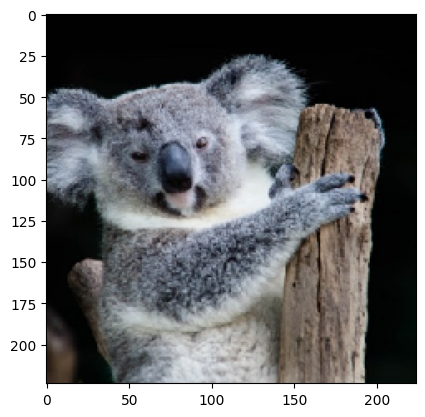

Target image class label: 866 (tractor)


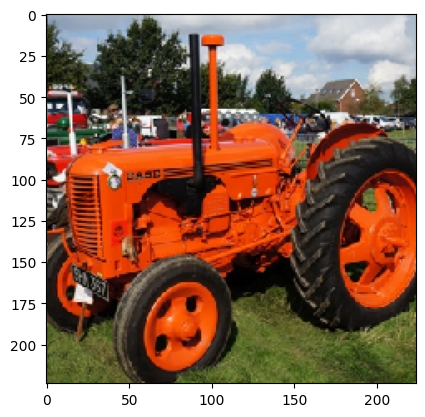

In [4]:
init_class_id = np.argmax(model.predict(np.array([init_image])))
print(f"Init image class label: {init_class_id} ({class_lookup[init_class_id]})")
plt.imshow(init_image.astype(np.uint))
plt.show()

target_class_id = np.argmax(model.predict(np.array([target_image])))
print(f"Target image class label: {target_class_id} ({class_lookup[target_class_id]})")
plt.imshow(target_image.astype(np.uint))
plt.show()

## Implementation av er attack

Beskriv i er rapport vad just er valda attack kallas och i detalj hur den fungerar (sektion 2.2 i rapporten). Beskriv även kort vilka bibliotek ni använder för att implementera den.

## Er kod för attacken

I cellerna nedan lägger ni in er egen kod för att genomföra attacken.

### Bibliotek

In [5]:
# Samla era import statements här e.g.
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# ...
from art.defences.preprocessor import SpatialSmoothing

### Egna funktioner

In [6]:
# Samla era egna funktioner relaterade till attacken här
# Funktionerna ska kort beskrivas med docstrings och kommentarer så att man förstår syftet och implementationen
# Blir det många bör ni bryta ut dessa i en separat fil
ones = np.ones([224, 224, 3])
imagenet_means = np.ones([224, 224, 3])
imagenet_means[...,0].fill(103.939)
imagenet_means[...,1].fill(116.779)
imagenet_means[...,2].fill(123.68)

### Förberedelser

In [7]:
# E.g. inläsning av modell och dataset

### Modellering

In [8]:
# E.g. träning
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(imagenet_means, ones))

### Attack

Beskriv attackprocessen kortfattat här

Boundary attack - iterations: 0it [00:00, ?it/s]?it/s]
Boundary attack: 100%|██████████| 1/1 [00:00<00:00, 110.87it/s]


Adversarial image at step 0. L2 error 44266.375 and class label 866.


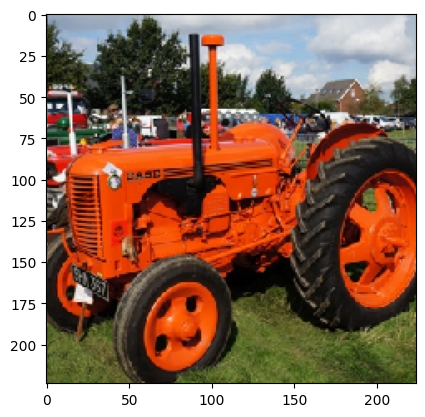

Boundary attack: 100%|██████████| 1/1 [06:20<00:00, 380.62s/it]


Adversarial image at step 200. L2 error 10627.022 and class label 866.


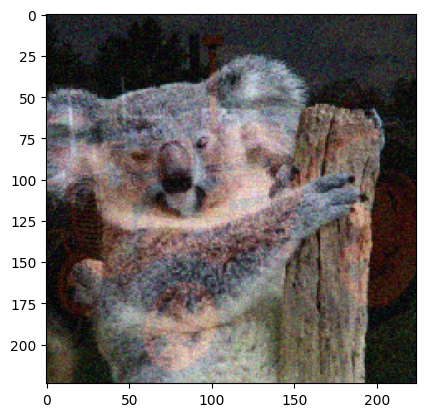

Boundary attack: 100%|██████████| 1/1 [06:55<00:00, 415.85s/it]


Adversarial image at step 400. L2 error 8382.472 and class label 866.


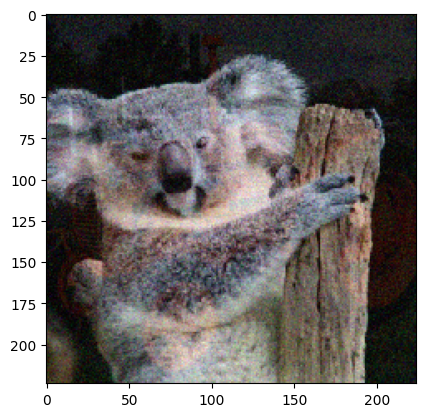

Boundary attack: 100%|██████████| 1/1 [08:30<00:00, 511.00s/it]


Adversarial image at step 600. L2 error 7171.371 and class label 866.


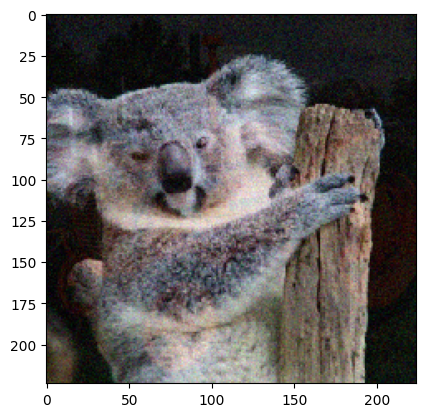

Boundary attack: 100%|██████████| 1/1 [09:29<00:00, 569.23s/it]


Adversarial image at step 800. L2 error 6395.512 and class label 866.


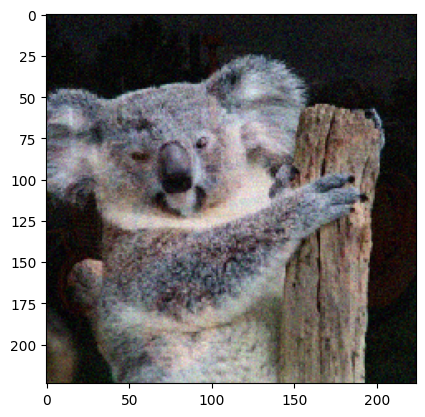

Boundary attack: 100%|██████████| 1/1 [10:19<00:00, 619.05s/it]


Adversarial image at step 1000. L2 error 5721.7773 and class label 866.


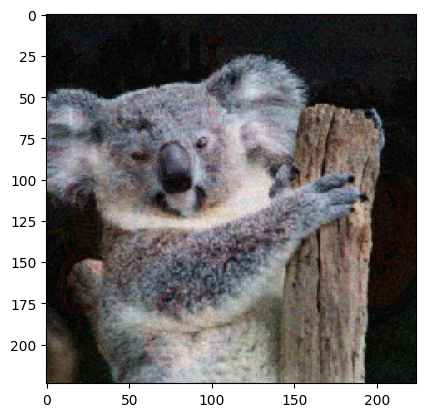

Boundary attack: 100%|██████████| 1/1 [08:08<00:00, 488.46s/it]


Adversarial image at step 1200. L2 error 5168.8096 and class label 866.


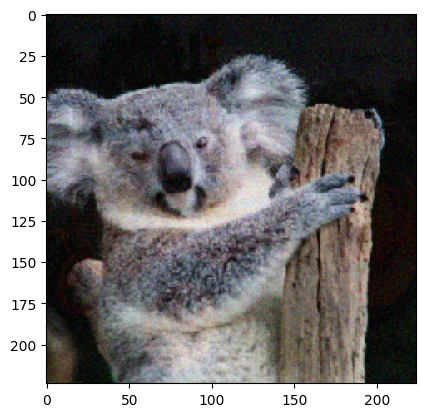

Boundary attack: 100%|██████████| 1/1 [08:13<00:00, 493.03s/it]


Adversarial image at step 1400. L2 error 4723.667 and class label 866.


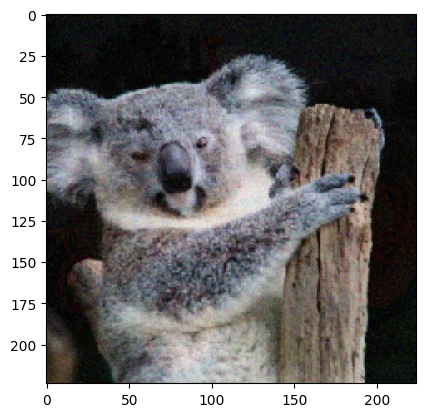

Boundary attack: 100%|██████████| 1/1 [08:25<00:00, 505.17s/it]


Adversarial image at step 1600. L2 error 4264.9966 and class label 866.


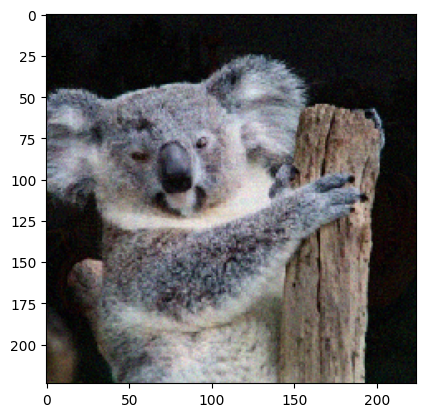

Boundary attack: 100%|██████████| 1/1 [08:32<00:00, 512.27s/it]


Adversarial image at step 1800. L2 error 3952.0723 and class label 866.


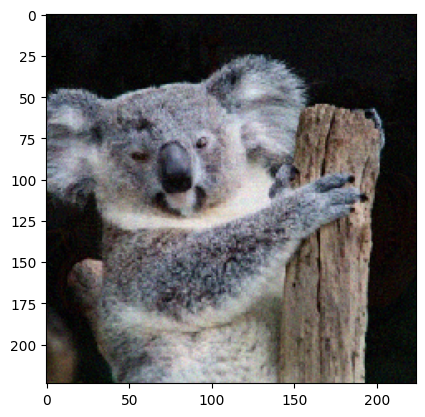

Boundary attack: 100%|██████████| 1/1 [08:26<00:00, 506.15s/it]


Adversarial image at step 2000. L2 error 3663.1055 and class label 866.


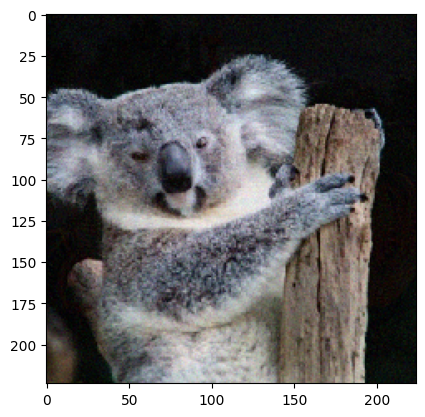

Boundary attack: 100%|██████████| 1/1 [08:15<00:00, 495.64s/it]


Adversarial image at step 2200. L2 error 3457.0027 and class label 866.


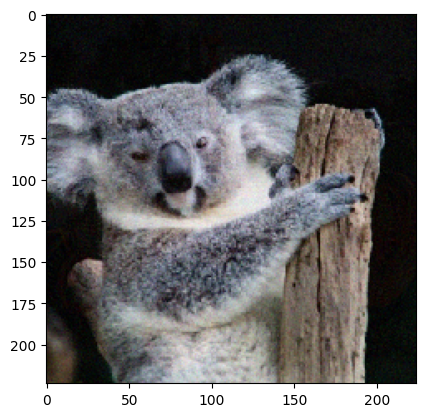

Boundary attack: 100%|██████████| 1/1 [08:14<00:00, 494.81s/it]


Adversarial image at step 2400. L2 error 3239.0142 and class label 866.


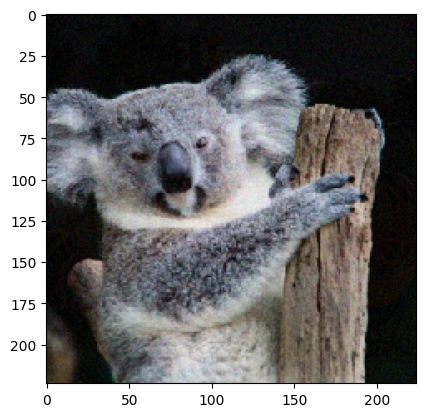

Boundary attack: 100%|██████████| 1/1 [08:51<00:00, 531.78s/it]


Adversarial image at step 2600. L2 error 3079.951 and class label 866.


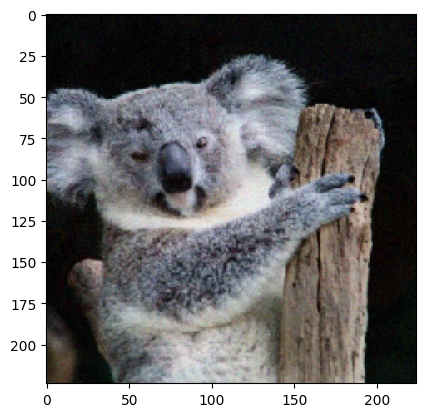

Boundary attack: 100%|██████████| 1/1 [08:03<00:00, 483.40s/it]


Adversarial image at step 2800. L2 error 2927.5383 and class label 866.


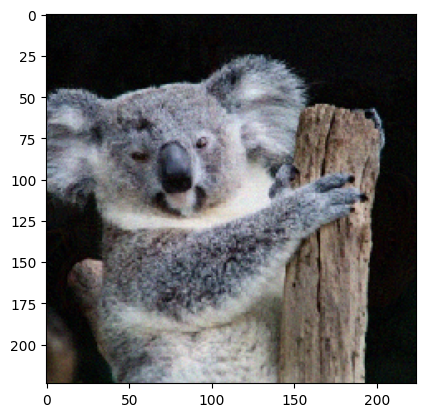

Boundary attack: 100%|██████████| 1/1 [09:15<00:00, 555.06s/it]


Adversarial image at step 3000. L2 error 2784.9978 and class label 866.


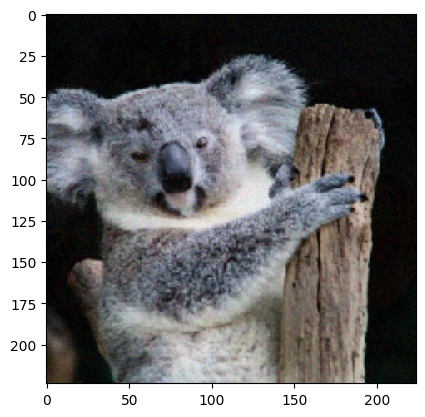

Boundary attack: 100%|██████████| 1/1 [07:26<00:00, 446.78s/it]


Adversarial image at step 3200. L2 error 2645.8357 and class label 866.


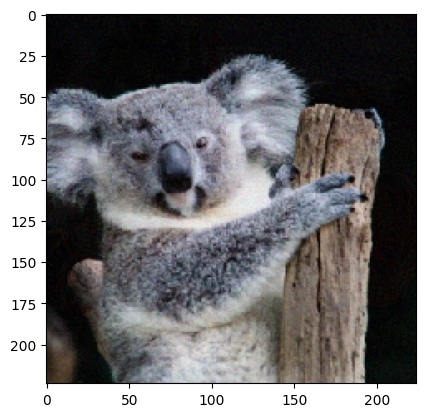

Boundary attack: 100%|██████████| 1/1 [05:55<00:00, 355.49s/it]


Adversarial image at step 3400. L2 error 2530.4768 and class label 866.


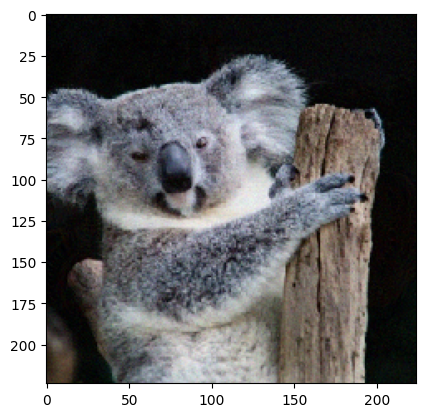

Boundary attack: 100%|██████████| 1/1 [10:41<00:00, 641.06s/it]


Adversarial image at step 3600. L2 error 2404.5625 and class label 866.


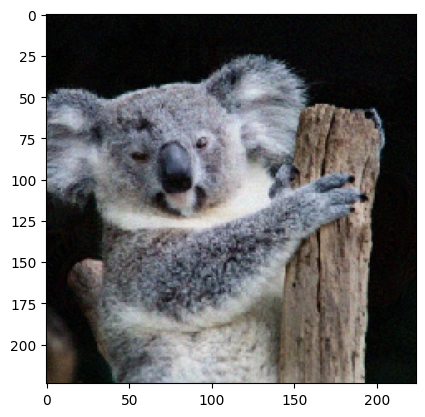

Boundary attack: 100%|██████████| 1/1 [14:50<00:00, 890.09s/it]


Adversarial image at step 3800. L2 error 2307.4927 and class label 866.


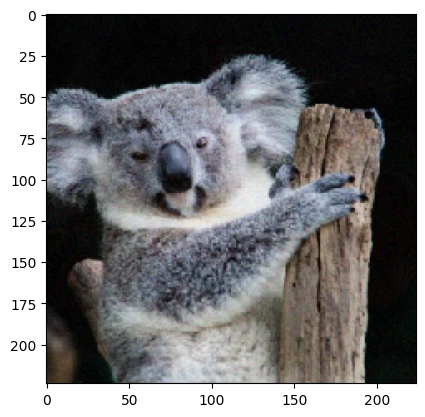

In [9]:
# Attackutförande
attack = BoundaryAttack(estimator=classifier, targeted=True, max_iter=0, delta=0.001, epsilon=0.001)
iter_step = 200
adversarial_image = np.array([target_image[..., ::-1]])

for i in range(20):
    adversarial_image = attack.generate(x=np.array([init_image[..., ::-1]]), y=to_categorical([866], 1000), x_adv_init=adversarial_image)

    #clear_output()    
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(adversarial_image[0] - init_image[..., ::-1], [-1])),
          "and class label %d." % np.argmax(classifier.predict(adversarial_image)[0]))
    plt.imshow(adversarial_image[0][..., ::-1].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break

### Attackresultat

Summera och förklara era attackresultat i flytande text här

Adversarial image class label: 866 (tractor)


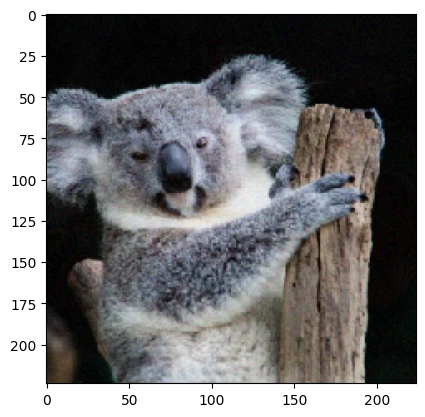

In [10]:
# Presentera attackens resultat m.h.a. kod här
preprocessed_adversarial_image = adversarial_image - imagenet_means
adversarial_class_id = np.argmax(model.predict(preprocessed_adversarial_image))
print(f"Adversarial image class label: {adversarial_class_id} ({class_lookup[adversarial_class_id]})")
plt.imshow(adversarial_image[0][..., ::-1].astype(np.uint))
plt.show()

## Skyddsåtgärder

Beskriv (i rapportens sektion 2.3) vilka säkerhetsåtgärd(er) ni valt som lämpliga för att skydda mot er attack. Motivera varför ni valt just de(n) metod(erna).

## Implementation av skyddsåtgärder (frivilligt endast för A eller B)

Nedan fyller ni i er kod som implementerar skyddsmekanismen mot er attackmetod. Skriv även en summering av vad skyddsresultatet blev när ni implementerade metoden (beskriv detta i rapportens del 2.4).

### Egna funktioner

In [11]:
# Samla era egna funktioner relaterade till säkerhetsåtgärden här
# Funktionerna ska kort beskrivas med docstrings och kommentarer så att man förstår syftet och implementationen
# Blir det många bör ni bryta ut dessa i en separat fil

### Förberedelser

In [12]:
# E.g. skapande av ny modell, etc.
ss_filter = SpatialSmoothing(window_size=3)

### Skydd

Beskriv säkerhetsåtgärden kortfattat här

In [13]:
# Implementation av skyddsåtgärd
ss_init_image, _ = ss_filter(np.array([init_image]))
ss_target_image, _ = ss_filter(np.array([target_image]))
ss_prep_adversial_image, _ = ss_filter(preprocessed_adversarial_image)
ss_adversial_image, _ = ss_filter(adversarial_image)

### Skyddsresultat

Bevisa och förklara era skyddsresultat i flytande text här

Initial image class label: 105 (koala)


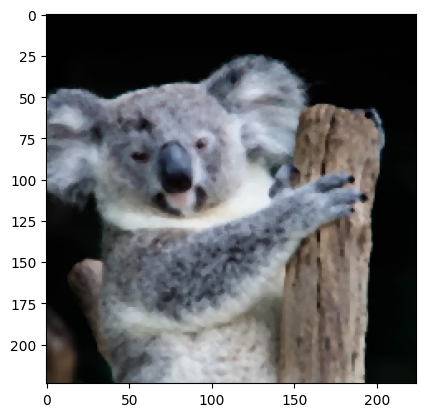

Target image class label: 866 (tractor)


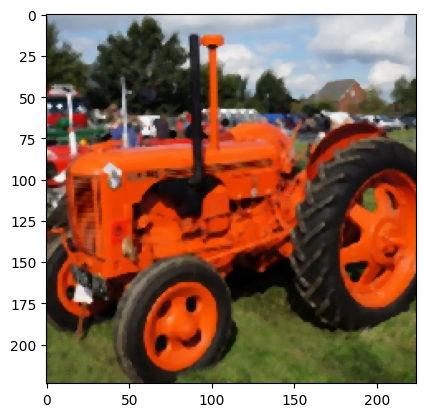

Adversarial image class label: 105 (koala)


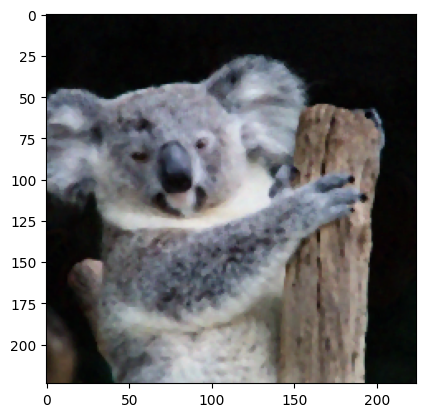

In [15]:
# Presentera skyddåtgärdens resultat m.h.a. kod här
init_class_id = np.argmax(model.predict(ss_init_image))
print(f"Initial image class label: {init_class_id} ({class_lookup[init_class_id]})")
plt.imshow(ss_init_image[0].astype(np.uint))
plt.show()

target_class_id = np.argmax(model.predict(ss_target_image))
print(f"Target image class label: {target_class_id} ({class_lookup[target_class_id]})")
plt.imshow(ss_target_image[0].astype(np.uint))
plt.show()

adversarial_class_id = np.argmax(model.predict(ss_prep_adversial_image))
print(f"Adversarial image class label: {adversarial_class_id} ({class_lookup[adversarial_class_id]})")
plt.imshow(ss_adversial_image[0][..., ::-1].astype(np.uint))
plt.show()

# Referenser

[1] https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/attack_decision_based_boundary.ipynb

[2] https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/attack_defence_imagenet.ipynb